### Subset scRNAseq data from matched individuals for label transfer to scATACseq

In [1]:
import numpy as np
import pandas as pd
import scanpy as sc
import anndata
import os

import sys

def MovePlots(plotpattern, subplotdir):
    os.system('mkdir -p '+str(sc.settings.figdir)+'/'+subplotdir)
    os.system('mv '+str(sc.settings.figdir)+'/*'+plotpattern+'** '+str(sc.settings.figdir)+'/'+subplotdir)

sc.settings.verbosity = 3  # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.settings.figdir = '/home/jovyan/MULTIOME_july2021/figures_females/'
sc.logging.print_versions()
sc.settings.set_figure_params(dpi=80)  # low dpi (dots per inch) yields small inline figures

sys.executable

-----
anndata     0.7.5
scanpy      1.7.0
sinfo       0.3.1
-----
PIL                 8.1.0
anndata             0.7.5
backcall            0.2.0
cairo               1.20.0
cffi                1.14.4
constants           NA
cycler              0.10.0
cython_runtime      NA
dateutil            2.8.1
decorator           4.4.2
get_version         2.1
h5py                3.1.0
highs_wrapper       NA
igraph              0.8.3
ipykernel           5.4.3
ipython_genutils    0.2.0
jedi                0.18.0
joblib              1.0.0
kiwisolver          1.3.1
legacy_api_wrap     1.2
leidenalg           0.8.3
llvmlite            0.35.0
matplotlib          3.3.4
mpl_toolkits        NA
natsort             7.1.1
numba               0.52.0
numexpr             2.7.2
numpy               1.21.2
packaging           20.9
pandas              1.2.1
parso               0.8.1
pexpect             4.8.0
pickleshare         0.7.5
pkg_resources       NA
prompt_toolkit      3.0.14
ptyprocess          0.7.0
pygments  

'/opt/conda/envs/atac_env/bin/python'

#### Load scRNAseq data

In [2]:
adata = sc.read('/nfs/users/nfs_l/lg18/team292/lg18/with_valentina/gonadsV2_revision/FCA-gonads_rawcounts.h5ad')
metadata = pd.read_csv('/nfs/users/nfs_l/lg18/team292/lg18/with_valentina/gonadsV2_revision/FCA-gonads_female_annotated.csv', index_col = 0)


/opt/conda/envs/atac_env/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3155: DtypeWarning: Columns (29,30,32) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
metadata.head()

,n_genes,sample,donor,location,stage,sex,study,batch_collection,enrichment,cryopreserved,...,lineages_v1,celltype_v1,lineage_v2,somatic_celltype_v2,PCW,sample_source,trimester,leiden,leiden_R,lineage
FCA_GND8047885_AAACCTGAGCACACAG,2554,FCA_GND8047885,F81,Gonad_and_extragonadal,8.8,female,FCA,A,CD45-,No,...,Supporting_female,preGC_II,Supporting,preGC_IIa,8.8,N,1st,1,1,preGranulosa
FCA_GND8047885_AAACCTGAGCACGCCT,2032,FCA_GND8047885,F81,Gonad_and_extragonadal,8.8,female,FCA,A,CD45-,No,...,Supporting_female,preGC_II_hypoxia,Supporting,preGC_IIa,8.8,N,1st,1,1,preGranulosa
FCA_GND8047885_AAACCTGAGCAGCCTC,2664,FCA_GND8047885,F81,Gonad_and_extragonadal,8.8,female,FCA,A,CD45-,No,...,Mesenchymal_LHX9_ARX,M_cycling,Mesenchymal_LHX9,Gi,8.8,N,1st,3,3,Mesenchymal_LHX9
FCA_GND8047885_AAACCTGAGCCACGCT,2256,FCA_GND8047885,F81,Gonad_and_extragonadal,8.8,female,FCA,A,CD45-,No,...,Supporting_female,sLGR5,Supporting,preGC_IIa,8.8,N,1st,7,7,Supporting
FCA_GND8047885_AAACCTGAGCTTTGGT,2064,FCA_GND8047885,F81,Gonad_and_extragonadal,8.8,female,FCA,A,CD45-,No,...,lowQC,lowQC,Mesenchymal_LHX9,Oi,8.8,N,1st,3,3,Mesenchymal_LHX9


In [4]:
mapping = metadata['lineage'].to_dict()
adata.obs['lineage'] = adata.obs.index.map(mapping)

In [5]:
adata.obs['lineage'].value_counts(dropna = False)

NaN                  152593
Mesenchymal_GATA2     48660
preGranulosa          38881
Mesenchymal_LHX9      30946
Supporting            24168
lowQC                 21802
CoelEpi               21411
Epithelial            16495
GermCells             10892
PV                    10338
Endothelial            8362
SMCs                   3044
Immune                 2627
Neural                 2264
Doublet                1841
cont                   1378
Erythroid               863
Name: lineage, dtype: int64

In [6]:
np.unique(adata.obs['donor'])

array(['F100', 'F122', 'F123', 'F126', 'F133', 'F81', 'F83', 'F84', 'F86',
       'F87', 'F88', 'F89', 'F91', 'F93', 'F96', 'F99', 'Hrv10', 'Hrv11',
       'Hrv12', 'Hrv13', 'Hrv15', 'Hrv16', 'Hrv17', 'Hrv18', 'Hrv21',
       'Hrv25', 'Hrv27', 'Hrv3', 'Hrv30', 'Hrv31', 'Hrv32', 'Hrv33',
       'Hrv34', 'Hrv37', 'Hrv39', 'Hrv40', 'Hrv41', 'Hrv47', 'Hrv49',
       'Hrv51', 'Hrv54', 'Hrv55', 'Hrv57', 'Hrv58', 'Hrv59', 'Hrv85',
       'Hrv86', 'Hrv91', 'Hrv92', 'Hrv93', 'Hrv99'], dtype=object)

In [7]:
adata = adata[[i in ['female'] for i in adata.obs.sex]]

/opt/conda/envs/atac_env/lib/python3.8/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)


#### Select matching samples from ATACseq

In [8]:
matching = ['F81', 'Hrv11', 'Hrv12', 'Hrv13', 'Hrv39', 'Hrv49', 'Hrv50',
       'Hrv58', 'Hrv59', 'Hrv65', 'Hrv91', 'Hrv92'] # females
adata = adata[[i in matching for i in adata.obs['donor']]]
adata.shape

(83329, 28820)

In [9]:
adata.obs['lineage'].value_counts(dropna = False)

Mesenchymal_GATA2    18728
Mesenchymal_LHX9     10891
lowQC                10462
Supporting            9157
preGranulosa          8550
Epithelial            5679
PV                    5309
CoelEpi               3583
Endothelial           3176
SMCs                  3038
GermCells             2474
Immune                1008
Neural                 830
Doublet                337
Erythroid              105
cont                     2
Name: lineage, dtype: int64

In [10]:
adata = adata[[i not in ['cont', 'Doublet', 'lowQC']
              for i in adata.obs['lineage']]]

In [11]:
adata.obs['lineage'].value_counts(dropna = False)

Mesenchymal_GATA2    18728
Mesenchymal_LHX9     10891
Supporting            9157
preGranulosa          8550
Epithelial            5679
PV                    5309
CoelEpi               3583
Endothelial           3176
SMCs                  3038
GermCells             2474
Immune                1008
Neural                 830
Erythroid              105
Name: lineage, dtype: int64

#### Downsample 

In [12]:
myindex = adata.obs['lineage'].value_counts().index 
myvalues = adata.obs['lineage'].value_counts().values
clusters = pd.Series(myvalues, index = myindex)
clusters.values

array([18728, 10891,  9157,  8550,  5679,  5309,  3583,  3176,  3038,
        2474,  1008,   830,   105])

In [13]:
import random
from itertools import chain

# Find clusters with > n cells
n = 8000
cl2downsample = clusters.index[ clusters.values > n ]

# save all barcode ids from small clusters
holder = []
holder.append( adata.obs_names[[ i not in cl2downsample for i in adata.obs['lineage'] ]] ) 

# randomly sample n cells in the cl2downsample
for cl in cl2downsample:
    print(cl)
    cl_sample = adata[[ i == cl for i in adata.obs['lineage'] ]].obs_names
    # n = int(round(len(cl_sample)/2, 0))
    cl_downsample = random.sample(set(cl_sample), n )
    holder.append(cl_downsample)
    
# samples to include
samples = list(chain(*holder))

# Filter adata_count
adata = adata[[ i in samples for i in adata.obs_names ]]
adata.X.shape

Mesenchymal_GATA2
Mesenchymal_LHX9
Supporting
preGranulosa


(57202, 28820)

In [14]:
adata

View of AnnData object with n_obs × n_vars = 57202 × 28820
    obs: 'n_genes', 'sample', 'donor', 'location', 'stage', 'sex', 'study', 'batch_collection', 'enrichment', 'cryopreserved', 'TP', '10xKit', 'dig_protocol', 'percent_mito', 'n_counts', 'batch', 'low_ncounts', 'high_mito', 'low_ncounts_high_mito', 'S_score', 'G2M_score', 'phase', 'scrublet_score', 'scrublet_cluster_score', 'zscore', 'bh_pval', 'bonf_pval', 'is_doublet', 'lineages_v1', 'celltype_v1', 'lineage_v2', 'somatic_celltype_v2', 'PCW', 'sample_source', 'trimester', 'lineage'
    var: 'gene_ids-0', 'feature_types-0', 'n_cells-0', 'gene_ids-1', 'feature_types-1', 'n_cells-1', 'gene_ids-10', 'feature_types-10', 'n_cells-10', 'gene_ids-11', 'feature_types-11', 'n_cells-11', 'gene_ids-12', 'feature_types-12', 'n_cells-12', 'gene_ids-13', 'feature_types-13', 'n_cells-13', 'gene_ids-14', 'feature_types-14', 'n_cells-14', 'gene_ids-15', 'feature_types-15', 'n_cells-15', 'gene_ids-16', 'feature_types-16', 'n_cells-16', 'gene_ids

#### Save anndata object to perform integration with ATAC with Seurat

In [15]:
del adata.uns 

In [16]:
for i in adata.obs.columns:
    if i not in ['lineage', 'donor', 'sample']:
        del adata.obs[i] 

In [17]:
adata.obs

,sample,donor,lineage
FCA_GND8047885_AAACCTGAGCACACAG,FCA_GND8047885,F81,preGranulosa
FCA_GND8047885_AAACCTGAGCACGCCT,FCA_GND8047885,F81,preGranulosa
FCA_GND8047885_AAACCTGAGCAGCCTC,FCA_GND8047885,F81,Mesenchymal_LHX9
FCA_GND8047885_AAACCTGAGCCACGCT,FCA_GND8047885,F81,Supporting
FCA_GND8047885_AAACCTGAGTACGTAA,FCA_GND8047885,F81,preGranulosa
...,...,...,...
HD_F_GON9525516_TTTGTCACACATCTTT,HD_F_GON9525516,Hrv91,preGranulosa
HD_F_GON9525516_TTTGTCAGTAGTAGTA,HD_F_GON9525516,Hrv91,Mesenchymal_LHX9
HD_F_GON9525516_TTTGTCATCGGCGCAT,HD_F_GON9525516,Hrv91,Mesenchymal_LHX9
HD_F_GON9525516_TTTGTCATCGTCTGCT,HD_F_GON9525516,Hrv91,preGranulosa


In [18]:
for j in adata.var.columns:
    if j != 'gene_ids-0':
        del adata.var[j]

In [19]:
adata.var

,gene_ids-0
A1BG,ENSG00000121410
A1BG-AS1,ENSG00000268895
A1CF,nan
A2M,ENSG00000175899
A2M-AS1,ENSG00000245105
...,...
ZXDC,ENSG00000070476
ZYG11A,ENSG00000203995
ZYG11B,ENSG00000162378
ZYX,ENSG00000159840


In [20]:
adata

AnnData object with n_obs × n_vars = 57202 × 28820
    obs: 'sample', 'donor', 'lineage'
    var: 'gene_ids-0'

In [21]:
# Define variables
outdir = "/nfs/team292/vl6/my_MULTIOME_dir/females_july2021/"
experiment_prefix = 'females_'

In [22]:
adata.write(outdir + experiment_prefix + "_RNAseq.h5ad")

... storing 'lineage' as categorical


In [15]:
adata.obs['annotated_clusters'].value_counts(dropna = False)

M_MGP               14542
preGC_II_KITLG      14067
preGC_III_GJA1      13518
Oi                  11065
preGC_I_OSR1        10741
Germ cells           8281
Epithelial           7238
M_MullDuct_LGR5      6639
PV                   5298
Gi                   5120
Endothelial          5080
ovarianSurf          4511
Erythroid            3945
Oi-like              3819
M_prog_ISL1          3643
M_ALX1               3068
M_MullDuct_AMHR2     2522
coelEpi              2335
sLGR5                2183
Immune               1876
sPAX8                1411
Neural                989
sKITLG                740
Name: annotated_clusters, dtype: int64

In [33]:
intragonadal = adata[[i not in ['M_MGP', 'Epithelial', 'Erythroid', 'M_prog_ISL1', 'M_ALX1', 'M_MullDuct_AMHR2', 'M_MullDuct_LGR5', 'Neural',
                               ] for i in adata.obs['annotated_clusters']]]

/opt/conda/envs/atac_env/lib/python3.8/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)


In [34]:
intragonadal.obs['annotated_clusters'] = intragonadal.obs['annotated_clusters'].astype("category")

Trying to set attribute `.obs` of view, copying.


In [35]:
intragonadal.obs['annotated_clusters'] = ['Oi' if i == 'Oi-like' else i for i in intragonadal.obs['annotated_clusters']]

In [36]:
intragonadal.obs['annotated_clusters'].value_counts(dropna = False)

Oi                14884
preGC_II_KITLG    14067
preGC_III_GJA1    13518
preGC_I_OSR1      10741
Germ cells         8281
PV                 5298
Gi                 5120
Endothelial        5080
ovarianSurf        4511
coelEpi            2335
sLGR5              2183
Immune             1876
sPAX8              1411
sKITLG              740
Name: annotated_clusters, dtype: int64

In [37]:
intragonadal.obs['annotated_clusters'] = intragonadal.obs['annotated_clusters'].astype("category")
intragonadal.obs['annotated_clusters'] = intragonadal.obs['annotated_clusters'].cat.reorder_categories(['Germ cells',
                                            'coelEpi',  'sLGR5', 'sKITLG', 'sPAX8', 'preGC_I_OSR1',
                                            'ovarianSurf','preGC_II_KITLG', 'preGC_III_GJA1',
                                            'Oi', 'Gi', 'PV','Endothelial', 'Immune'])

... storing 'manual_clusters' as categorical


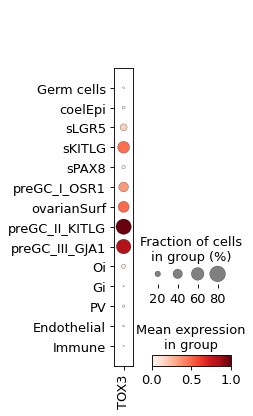

In [38]:
sc.pl.dotplot(intragonadal, var_names = ['TOX3'], groupby = 'annotated_clusters', 
             save = 'TOX3', standard_scale = 'var')